In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/machine-learning-on-titanic-data-set/train.csv
/kaggle/input/machine-learning-on-titanic-data-set/gender_submission.csv
/kaggle/input/machine-learning-on-titanic-data-set/test.csv


In [50]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [51]:
#check if there is any column which has null values
# if column value has false then it has no null/nan value
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [52]:
# gives how many null values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# get most frequent word in Embarked column
train_data['Embarked'].value_counts()
# because null values are very less in Embarked column so we can replace null values with most frequent value of column
train_data['Embarked'] = train_data['Embarked'].fillna('S')



test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [54]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [55]:
# so many null values in columns cabin so we can drop but not necessary
train_data = train_data.drop(columns = {'Cabin'})
# also no need of passenger id , so drop it also
train_data = train_data.drop(columns = {'PassengerId'})
# also drop ticket but feel free to take into consideration
train_data = train_data.drop(columns = {'Ticket'})


# so many null values in columns cabin so we can drop but not necessary
test_data = test_data.drop(columns = {'Cabin'})
# also no need of passenger id , so drop it also
test_data = test_data.drop(columns = {'PassengerId'})
# also drop ticket but feel free to take into consideration
test_data = test_data.drop(columns = {'Ticket'})

In [56]:
# now convert all column value in numeric value
# sex column value is getting converted
train_data['Sex'] = train_data['Sex'].map( { 'male': 1, 'female': 0 } ).astype(int)
test_data['Sex'] = test_data['Sex'].map( { 'male': 1, 'female': 0 } ).astype(int)
    

In [57]:
train_data['Embarked'] = train_data['Embarked'].map( { 'C': 0, 'Q': 1 , 'S' : 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( { 'C': 0, 'Q': 1 , 'S' : 2} ).astype(int)

In [58]:

# we can categorize it into 4 ranges because our all feature's value is nearly in range of [0, 3] but not necessary
# so that normalization could als be achieved, 
train_data['Age'] = pd.qcut(train_data['Age'],4)
range_of_age = set(train_data['Age'])
range_of_age

{Interval(0.419, 22.0, closed='right'),
 Interval(22.0, 29.699, closed='right'),
 Interval(29.699, 35.0, closed='right'),
 Interval(35.0, 80.0, closed='right')}

In [59]:
# use label encoder to convert these age categoris into numeric values
le = LabelEncoder()
train_data['Age'] = le.fit_transform(train_data['Age'])
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,1,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,2,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,1,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,0,0,0,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,1,0,0,30.0000,0


In [60]:
# also apply qcut on fare and then use labelencoder , feel free to use different number of bins
train_data['Fare'] = pd.qcut(train_data['Fare'],4)
s = set(train_data['Fare'])
s

{Interval(-0.001, 7.91, closed='right'),
 Interval(7.91, 14.454, closed='right'),
 Interval(14.454, 31.0, closed='right'),
 Interval(31.0, 512.329, closed='right')}

In [61]:
train_data['Fare'] = le.fit_transform(train_data['Fare'])
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,0,1,0,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,3,0
2,1,3,"Heikkinen, Miss. Laina",0,1,0,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,3,2
4,0,3,"Allen, Mr. William Henry",1,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,1,0,0,1,2
887,1,1,"Graham, Miss. Margaret Edith",0,0,0,0,2,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,2,2
889,1,1,"Behr, Mr. Karl Howell",1,1,0,0,2,0


In [62]:
# here I am ignoring Name column but feel free to use it and extrct title like Mr. / miss/ mrs. 
# and encode it using label encoder.
train_data = train_data.drop(columns =  {'Name'})
test_data = test_data.drop(columns =  {'Name'})

In [63]:
# Now split features and labels as x and y respectively
features = list(train_data.columns)
features.remove('Survived')
x = train_data[features]
y = train_data['Survived']


In [64]:
# import all libraries that will be used 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [65]:
# simply list all classifiers , feel free to use and change hyperparameters
classifiers = [
                KNeighborsClassifier(4),
                SVC(),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                GaussianNB(),
                LinearDiscriminantAnalysis(),
                QuadraticDiscriminantAnalysis(),
                LogisticRegression()

             ]

In [67]:
#list performance metrics 
performance = ["Accuracy" , "F1_Score" , "Precision" , "Recall"]

accuracy_dict = {}
for i in classifiers:
    i = i.__class__.__name__
    accuracy_dict[i] = 0
accuracy_dict


{'KNeighborsClassifier': 0,
 'SVC': 0,
 'DecisionTreeClassifier': 0,
 'RandomForestClassifier': 0,
 'AdaBoostClassifier': 0,
 'GradientBoostingClassifier': 0,
 'GaussianNB': 0,
 'LinearDiscriminantAnalysis': 0,
 'QuadraticDiscriminantAnalysis': 0,
 'LogisticRegression': 0}

In [74]:
# k-fold, stratifieldkfold, stratifiedshufflesplit each with shuffle = false (bydefault) 
# and with parameters nsplits and random seed also.
skf = StratifiedKFold(n_splits = 10, shuffle = True)
x_nu = x.to_numpy()
y_nu = y.to_numpy()
# for applying split function we have to x and y as numpy, not dataframe
for skf_train_index, skf_test_index in skf.split(x_nu,y_nu):
    x_train , x_test = x_nu[skf_train_index] , x_nu[skf_test_index] 
    y_train , y_test = y_nu[skf_train_index] , y_nu[skf_test_index]
    for clf in classifiers:
        clf.fit(x_train, y_train)
        prediction = clf.predict(x_test)
        clf = clf.__class__.__name__
        acc = accuracy_score(y_test , prediction)
        accuracy_dict[clf] = accuracy_dict[clf] + acc

In [75]:
accuracy_dict

{'KNeighborsClassifier': 7.980274656679152,
 'SVC': 8.11485642946317,
 'DecisionTreeClassifier': 7.86828963795256,
 'RandomForestClassifier': 7.94669163545568,
 'AdaBoostClassifier': 7.9354556803995004,
 'GradientBoostingClassifier': 8.059051186017477,
 'GaussianNB': 7.631835205992511,
 'LinearDiscriminantAnalysis': 7.82334581772784,
 'QuadraticDiscriminantAnalysis': 7.867540574282147,
 'LogisticRegression': 7.935205992509363}

In [76]:
#find classifier with best accuracy value
proper_classifier = list(accuracy_dict.keys())[list(accuracy_dict.values()).index(max(accuracy_dict.values()))]
proper_classifier

'SVC'

In [77]:
indices = list(accuracy_dict.keys())
values = list(accuracy_dict.values())
df = pd.DataFrame(values,indices,columns = ['Accuracy'])
df

,Accuracy
KNeighborsClassifier,7.980275
SVC,8.114856
DecisionTreeClassifier,7.868290
RandomForestClassifier,7.946692
AdaBoostClassifier,7.935456
GradientBoostingClassifier,8.059051
GaussianNB,7.631835
LinearDiscriminantAnalysis,7.823346
QuadraticDiscriminantAnalysis,7.867541
LogisticRegression,7.935206


<Figure size 1280x480 with 0 Axes>

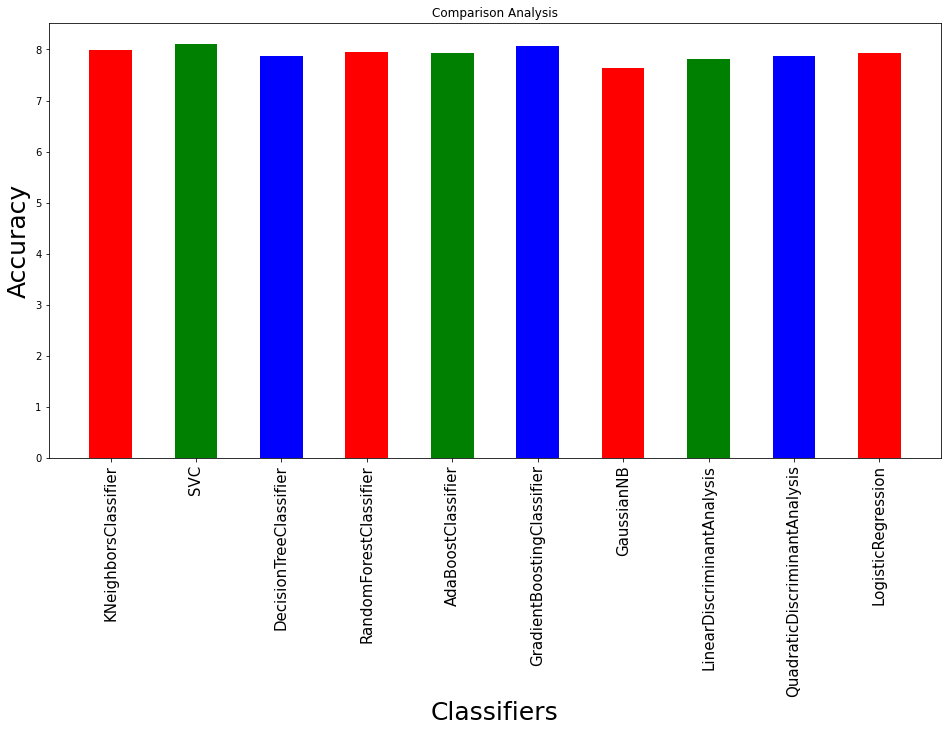

In [78]:
plt.figure(num = None, figsize=(16, 6), dpi=80, facecolor='b', edgecolor='w')
fig = plt.figure(figsize=(16,8))
plt.bar(indices, values, color = ['r','g','b'], width = 0.50)
plt.title("Comparison Analysis")
plt.xlabel("Classifiers", fontsize =25)
plt.ylabel("Accuracy",fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.show()



In [79]:
test_data.loc[ test_data['Age'] <= 22, 'Age']        = 0
test_data.loc[(test_data['Age'] > 22) & (test_data['Age'] <= 29.699), 'Age'] = 1
test_data.loc[(test_data['Age'] > 29.699) & (test_data['Age'] <= 35.0), 'Age'] = 2
test_data.loc[(test_data['Age'] > 35.0) & (test_data['Age'] <= 80.0), 'Age'] = 3



In [80]:
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare']        = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31.0), 'Fare'] = 2
test_data.loc[(test_data['Fare'] > 31.0) & (test_data['Fare'] <= 512.329), 'Fare'] = 3


In [81]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [82]:
clf = SVC()
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
final_prediction = clf.predict(test_data)

In [94]:
len(final_prediction)

418

In [85]:
list(test_data['Sex']).count(0)

152

In [87]:
ans = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [88]:
ans.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [91]:
list(ans['Survived']).count(0)

266

In [92]:
test_data_again = pd.read_csv("/kaggle/input/titanic/test.csv")

In [93]:
len(test_data_again)

418

In [95]:
test_data_again['Survived'] = final_prediction

In [98]:
submission = test_data_again[["PassengerId","Survived"]]

In [99]:
submission.to_csv('gender_submission.csv', index = False, header=True)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
